In [2]:
pwd


'C:\\Users\\admin'

In [3]:
cd C:\Users\admin\Downloads\Project 

C:\Users\admin\Downloads\Project


In [4]:
pip install tensorflow

In [5]:
pip install keras

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
pwd

'C:\\Users\\admin\\Downloads\\Project'

In [10]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

07-08-2022  13:52    <DIR>          .
07-08-2022  13:52    <DIR>          ..
07-08-2022  13:47        92,954,424 Fruit
01-08-2022  18:05    <DIR>          fruit-dataset
05-08-2022  17:07        98,764,637 fruit-dataset.zip
08-08-2022  10:54       111,319,360 Fruits.h5
07-08-2022  14:00        92,954,424 Project.tgz
01-08-2022  18:06    <DIR>          Veg-dataset
05-08-2022  17:24       237,022,044 Veg-dataset.zip
05-08-2022  21:43       111,324,760 Vegetables.h5
               6 File(s)    744,339,649 bytes
               4 Dir(s)  62,924,120,064 bytes free


In [11]:
x_train=train_datagen.flow_from_directory('C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\train',target_size=(64,64),class_mode='categorical',batch_size=32)

Found 5384 images belonging to 6 classes.


In [12]:
x_test=test_datagen.flow_from_directory('C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test',target_size=(64,64),class_mode='categorical',batch_size=32)

Found 1686 images belonging to 6 classes.


In [13]:
x_train.class_indices

{'Apple_Black_rot': 0,
 'Apple_healthy': 1,
 'Corn_(maize)_Northern_Leaf_Blight': 2,
 'Corn_(maize)_healthy': 3,
 'Peach_Bacterial_spot': 4,
 'Peach_healthy': 5}

CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

In [15]:
model=Sequential()

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

Hidden Layers

In [19]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layers

In [20]:
x_train.class_indices

{'Apple_Black_rot': 0,
 'Apple_healthy': 1,
 'Corn_(maize)_Northern_Leaf_Blight': 2,
 'Corn_(maize)_healthy': 3,
 'Peach_Bacterial_spot': 4,
 'Peach_healthy': 5}

In [21]:
model.add(Dense(6,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
len(x_train)

169

In [24]:
len(x_test)

53

In [25]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=1)

169/169 [==============================] - 306s 2s/step - loss: 0.7311 - accuracy: 0.7723 - val_loss: 0.2531 - val_accuracy: 0.9081


In [26]:
ls


 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

07-08-2022  13:52    <DIR>          .
07-08-2022  13:52    <DIR>          ..
07-08-2022  13:47        92,954,424 Fruit
01-08-2022  18:05    <DIR>          fruit-dataset
05-08-2022  17:07        98,764,637 fruit-dataset.zip
08-08-2022  10:54       111,319,360 Fruits.h5
07-08-2022  14:00        92,954,424 Project.tgz
01-08-2022  18:06    <DIR>          Veg-dataset
05-08-2022  17:24       237,022,044 Veg-dataset.zip
05-08-2022  21:43       111,324,760 Vegetables.h5
               6 File(s)    744,339,649 bytes
               4 Dir(s)  62,921,375,744 bytes free


In [27]:
model.save('Fruits.h5')

In [28]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

07-08-2022  13:52    <DIR>          .
07-08-2022  13:52    <DIR>          ..
07-08-2022  13:47        92,954,424 Fruit
01-08-2022  18:05    <DIR>          fruit-dataset
05-08-2022  17:07        98,764,637 fruit-dataset.zip
08-08-2022  11:07       111,319,360 Fruits.h5
07-08-2022  14:00        92,954,424 Project.tgz
01-08-2022  18:06    <DIR>          Veg-dataset
05-08-2022  17:24       237,022,044 Veg-dataset.zip
05-08-2022  21:43       111,324,760 Vegetables.h5
               6 File(s)    744,339,649 bytes
               4 Dir(s)  62,921,379,840 bytes free


Test the model

In [29]:
import numpy as np

In [30]:
from tensorflow.keras.models import load_model

In [31]:
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('Fruits.h5')


In [33]:
pwd

'C:\\Users\\admin\\Downloads\\Project'

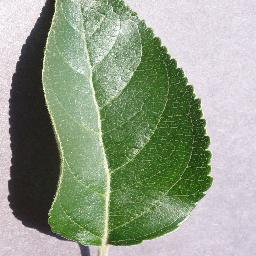

In [34]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Apple_healthy\\0e277198-95a0-4700-a7b0-f1881af2b1c0___RS_HL 7285.jpg")
img

In [35]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Apple_healthy\\0e277198-95a0-4700-a7b0-f1881af2b1c0___RS_HL 7285.jpg",target_size=(64,64))

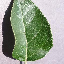

In [36]:
img

In [37]:
x=image.img_to_array(img)

In [38]:
x

array([[[245., 240., 244.],
        [235., 230., 234.],
        [246., 241., 245.],
        ...,
        [226., 218., 231.],
        [224., 216., 229.],
        [226., 218., 231.]],

       [[245., 240., 244.],
        [244., 239., 243.],
        [231., 226., 230.],
        ...,
        [226., 218., 231.],
        [225., 217., 230.],
        [218., 210., 223.]],

       [[248., 243., 247.],
        [239., 234., 238.],
        [243., 238., 242.],
        ...,
        [219., 211., 224.],
        [223., 215., 228.],
        [231., 223., 236.]],

       ...,

       [[216., 203., 212.],
        [215., 202., 211.],
        [218., 205., 214.],
        ...,
        [213., 205., 220.],
        [209., 201., 216.],
        [210., 202., 217.]],

       [[223., 210., 219.],
        [211., 198., 207.],
        [196., 183., 192.],
        ...,
        [212., 204., 219.],
        [203., 195., 210.],
        [209., 201., 216.]],

       [[217., 204., 213.],
        [203., 190., 199.],
        [202., 1

In [39]:
x.ndim

3

In [40]:
x.shape

(64, 64, 3)

In [41]:
x=np.expand_dims(x,axis=0)

In [42]:
x

array([[[[245., 240., 244.],
         [235., 230., 234.],
         [246., 241., 245.],
         ...,
         [226., 218., 231.],
         [224., 216., 229.],
         [226., 218., 231.]],

        [[245., 240., 244.],
         [244., 239., 243.],
         [231., 226., 230.],
         ...,
         [226., 218., 231.],
         [225., 217., 230.],
         [218., 210., 223.]],

        [[248., 243., 247.],
         [239., 234., 238.],
         [243., 238., 242.],
         ...,
         [219., 211., 224.],
         [223., 215., 228.],
         [231., 223., 236.]],

        ...,

        [[216., 203., 212.],
         [215., 202., 211.],
         [218., 205., 214.],
         ...,
         [213., 205., 220.],
         [209., 201., 216.],
         [210., 202., 217.]],

        [[223., 210., 219.],
         [211., 198., 207.],
         [196., 183., 192.],
         ...,
         [212., 204., 219.],
         [203., 195., 210.],
         [209., 201., 216.]],

        [[217., 204., 213.],
       

In [43]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 385ms/step


In [45]:
y

array([4], dtype=int64)

In [46]:
x_train.class_indices

{'Apple_Black_rot': 0,
 'Apple_healthy': 1,
 'Corn_(maize)_Northern_Leaf_Blight': 2,
 'Corn_(maize)_healthy': 3,
 'Peach_Bacterial_spot': 4,
 'Peach_healthy': 5}

In [47]:
index=['Apple_Black_rot','Apple_healthy','Corn_(maize)_Northern_Leaf_Blight','Corn_(maize)_healthy','Peach_Bacterial_spot','Peach_healthy']

In [48]:
index[y[0]]

'Peach_Bacterial_spot'

In [49]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Apple_Black_rot\\0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple_Black_rot','Apple_healthy','Corn_(maize)_Northern_Leaf_Blight','Corn_(maize)_healthy','Peach_Bacterial_spot','Peach_healthy']
index[y[0]]

1/1 [==============================] - 0s 28ms/step


'Apple_Black_rot'

In [50]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Corn_(maize)_Northern_Leaf_Blight\\1a11d38d-9be6-425c-bc0a-c0f158d6f5d8___RS_NLB 3667.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple_Black_rot','Apple_healthy','Corn_(maize)_Northern_Leaf_Blight','Corn_(maize)_healthy','Peach_Bacterial_spot','Peach_healthy']
index[y[0]]

1/1 [==============================] - 0s 16ms/step


'Corn_(maize)_Northern_Leaf_Blight'

In [51]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Peach_Bacterial_spot\\0cb7f854-0315-460e-9549-bb106a68d78a___Rutg._Bact.S 2147.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple_Black_rot','Apple_healthy','Corn_(maize)_Northern_Leaf_Blight','Corn_(maize)_healthy','Peach_Bacterial_spot','Peach_healthy']
index[y[0]]

1/1 [==============================] - 0s 31ms/step


'Peach_Bacterial_spot'

In [52]:
img=image.load_img("C:\\Users\\admin\\Downloads\\Project\\fruit-dataset\\test\\Corn_(maize)_healthy\\2a46f1cb-9c54-481c-a61f-d3729d5cfc3e___R.S_HL 8315 copy.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple_Black_rot','Apple_healthy','Corn_(maize)_Northern_Leaf_Blight','Corn_(maize)_healthy','Peach_Bacterial_spot','Peach_healthy']
index[y[0]]

1/1 [==============================] - 0s 31ms/step


'Corn_(maize)_healthy'

In [53]:
!pip install watson-machine-learning-client

In [54]:
pip install watson-machine-learning-client

In [55]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
 "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"YNqU7yLXzO7LvfVVmmrCs7kINFo-jmn5-K4gr32xYlwC"
}

In [56]:
client=APIClient(wml_credentials)

In [57]:
client

In [68]:
def guid_space_name(client,Fruit_disease_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==Fruit_disease_deploy)['metadata']['id'])

In [69]:
space_uid=guid_space_name(client,'Fruit_disease_deploy')
print(space_uid)

2bdb3278-a18e-45d1-8361-a32116439743


In [70]:
client.set.default_space(space_uid)

'SUCCESS'

In [76]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [79]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [80]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [81]:
!tar -zvcf Project.tgz Fruits.h5

a Fruits.h5


In [82]:
model_details=client.repository.store_model(model='Project.tgz',
                                            meta_props={
                                                       client.repository.ModelMetaNames.NAME:"Fruit disease detection",
                                                       client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
                                                       client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
                                            })

In [86]:
model_id=client.repository.get_model_id(model_details)

In [87]:
model_id

'8cb7ea9d-879d-4119-8b2f-60a86dde6614'

In [88]:
client.repository.download(model_id,'Fruits.tar.gb')

Successfully saved model content to file: 'Fruits.tar.gb'


'C:\\Users\\admin\\Downloads\\Project/Fruits.tar.gb'

In [89]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B069-50E3

 Directory of C:\Users\admin\Downloads\Project

08-08-2022  12:00    <DIR>          .
08-08-2022  12:00    <DIR>          ..
07-08-2022  13:47        92,954,424 Fruit
01-08-2022  18:05    <DIR>          fruit-dataset
05-08-2022  17:07        98,764,637 fruit-dataset.zip
08-08-2022  11:07       111,319,360 Fruits.h5
08-08-2022  12:00        91,064,403 Fruits.tar.gb
08-08-2022  11:53        91,064,403 Project.tgz
01-08-2022  18:06    <DIR>          Veg-dataset
05-08-2022  17:24       237,022,044 Veg-dataset.zip
05-08-2022  21:43       111,324,760 Vegetables.h5
               7 File(s)    833,514,031 bytes
               4 Dir(s)  62,781,181,952 bytes free
